In [1]:
import pandas as pd
from sodapy import Socrata
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from datetime import datetime

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("health.data.ny.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(health.data.ny.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("xdss-u53e",limit=200000) #limit = 62 counties in NY

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [2]:
df_tot_pos = results_df.drop(columns={'total_number_of_tests','cumulative_number_of_tests','new_positives'})
df_daily = results_df['new_positives']

#make a list of days (no duplicates)
days = results_df['test_date'].drop_duplicates()
#days.reset_index()
#---
date = {'date': [0]}

#Make empty dataframe

#Redo: iloc county column, remove duplicates
#--
#grab counties for any day/drop date column
df_temp = df_tot_pos.loc[results_df['test_date'] == days.iloc[0]]
df_temp = df_temp.drop(columns='test_date')
    
dft_temp = df_temp.T
#dft_temp
dft_temp = dft_temp.reset_index()

new_header = dft_temp.iloc[0] #grab the first row for the head
#print(new_header)
#--

#creat df, index as date
df = pd.DataFrame(columns = new_header)

#loop for each day in date list
for i in range(len(days)):
    #print(days.iloc[i])
    #data for i-th day
    today = days.iloc[i]
    #print(today)
    
    #get total positive for i-th day from results df
    df_today = df_tot_pos.loc[results_df['test_date'] == days.iloc[i]]
    df_today.drop(columns='test_date',inplace=True)
    
    dft = df_today.T
    
    new_header = dft.iloc[0] #grab the first row for the header
    df_temp = dft[1:] #take the data less the header row
    df_temp
    df_temp = df_temp.astype(str).astype(int)
    df_temp.fillna('0', inplace=True)

    
    df_temp.columns = new_header
    
    #df_temp.index.name = 'date'
    #df_temp.rename(index={: "x"},inplace=True)
    df_temp['dates'] = today 
    #print(df_temp)
    #print()
    df = df.append(df_temp,ignore_index = False,sort=True)
    
    #df = df.astype(str).astype(int)
    #df.Erie

#More reformatting
df.drop(['county'],axis=1,inplace=True)

#make date-time nicer
df.dates = pd.to_datetime(df.dates, yearfirst = True, format='%Y-%m-%dT%H:%M:%S.%f')
df.dates = df['dates'].dt.strftime('%m/%d/%Y')

df.set_index('dates',inplace=True)

df = df.iloc[1:]

df["sum"] = df.sum(axis=1)

df.sort_values('dates',ascending=True,inplace=True)

/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3]:
df

,Albany,Allegany,Bronx,Broome,Cattaraugus,Cayuga,Chautauqua,Chemung,Chenango,Clinton,...,Tioga,Tompkins,Ulster,Warren,Washington,Wayne,Westchester,Wyoming,Yates,sum
dates,,,,,,,,,,,,,,,,,,,,,
03/02/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
03/03/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
03/04/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.0
03/05/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,0,0,25.0
03/06/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,0,0,36.0
03/07/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,42,0,0,60.0
03/08/2020,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,60,0,0,88.0
03/09/2020,0,0,5,0,0,0,0,0,0,0,...,0,0,1,0,0,0,102,0,0,151.0
03/10/2020,0,0,5,0,0,0,0,0,0,0,...,0,0,1,0,0,0,111,0,0,195.0


In [4]:
#for col in df.columns: 
#    print(col) 

/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


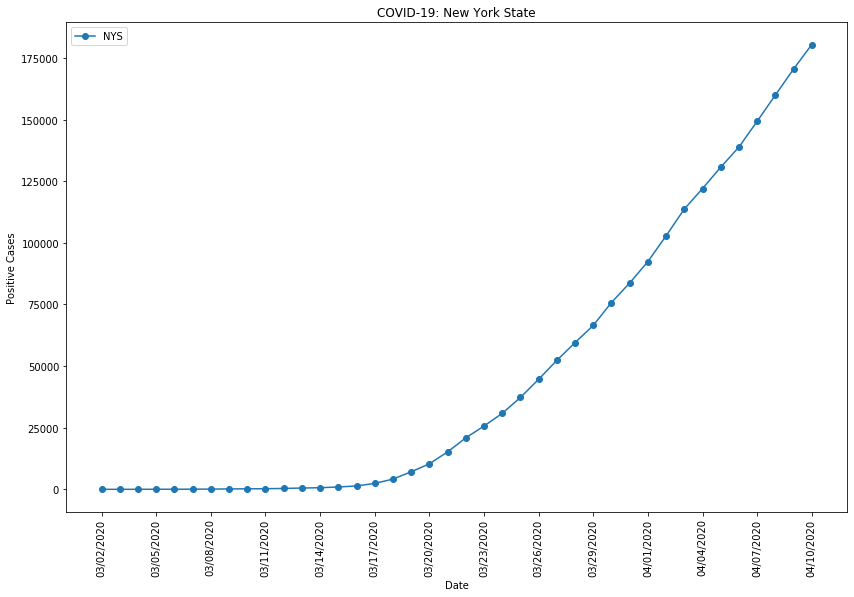

In [5]:
plt.figure(figsize=(14,9))

plt.plot_date(df.index,df['sum'].values,label='NYS',ls='-')
#plt.plot_date(df.dates,df.Bronx.values,label='Bronx',ls='-')


plt.xticks(rotation='vertical')
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.title('COVID-19: New York State')
plt.ylabel('Positive Cases')
plt.xlabel('Date')
leg = plt.legend();
plt.show()

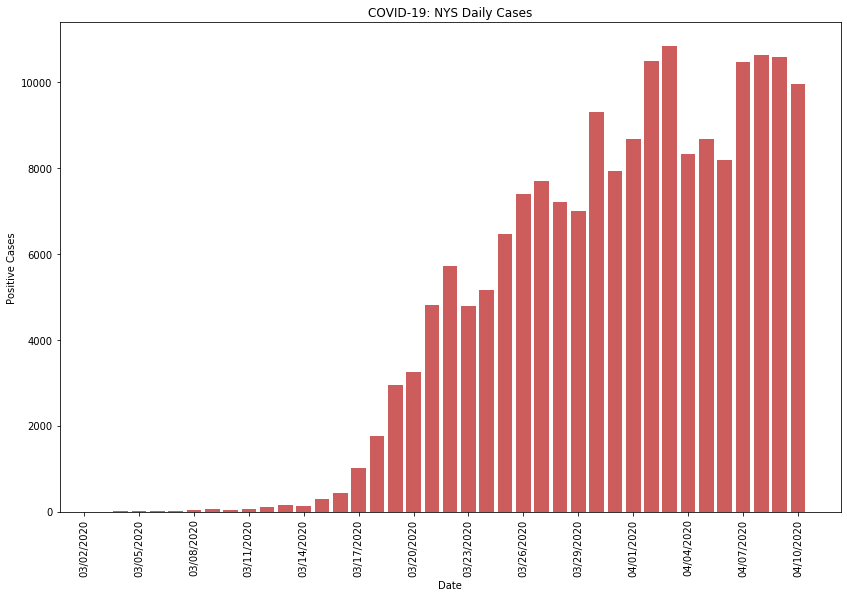

In [6]:
diff = df.diff()

plt.figure(figsize=(14,9))

#plt.bar(df.index, df['Erie'].values)
plt.bar(diff.index, diff['sum'].values,color='indianred')
#ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.title('COVID-19: NYS Daily Cases')
plt.ylabel('Positive Cases')
plt.xlabel('Date')
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.show()

In [7]:
#top 10
dft = df.T
dft
#dft.iloc[0,:]
today = len(dft.columns)-1
df_top = dft.sort_values(dft.columns[today], ascending = False)
df_top.head(13) #Buffalo/Erie is 13th!

dates,03/02/2020,03/03/2020,03/04/2020,03/05/2020,03/06/2020,03/07/2020,03/08/2020,03/09/2020,03/10/2020,03/11/2020,...,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,04/09/2020,04/10/2020
sum,1,1,3,25,36,60,88,151,195,251,...,92381,102863,113704,122031,130689,138863,149316,159937,170512,180458
Queens,0,0,0,1,2,2,3,3,7,12,...,16268,18167,20114,21436,23133,24840,26248,27752,29303,31291
Kings,0,0,1,1,4,4,6,7,14,16,...,14304,15700,17504,18558,19702,20879,22082,23394,24715,26243
Nassau,0,0,0,1,4,6,10,14,20,31,...,10587,12024,13346,14398,15616,16610,18548,20140,21512,22584
Bronx,0,0,0,0,0,0,1,5,5,7,...,9927,11086,12315,13368,14327,15348,16626,17792,19160,20477
Suffolk,0,0,0,0,0,0,1,1,6,11,...,8746,10154,11370,12405,13487,14517,15844,17413,18692,19883
Westchester,1,1,1,20,20,42,60,102,111,132,...,11567,12351,13081,13723,14294,14804,15887,17004,18077,18729
New York,0,0,1,2,5,5,5,12,24,27,...,7843,8452,9300,9898,10440,11012,11504,12106,12722,13437
Rockland,0,0,0,0,1,1,1,4,4,6,...,3751,4289,4872,5326,5703,5990,6413,6665,7122,7477
Richmond,0,0,0,0,0,0,0,0,1,2,...,3467,3754,4073,4291,4579,4797,5343,5984,6484,6860


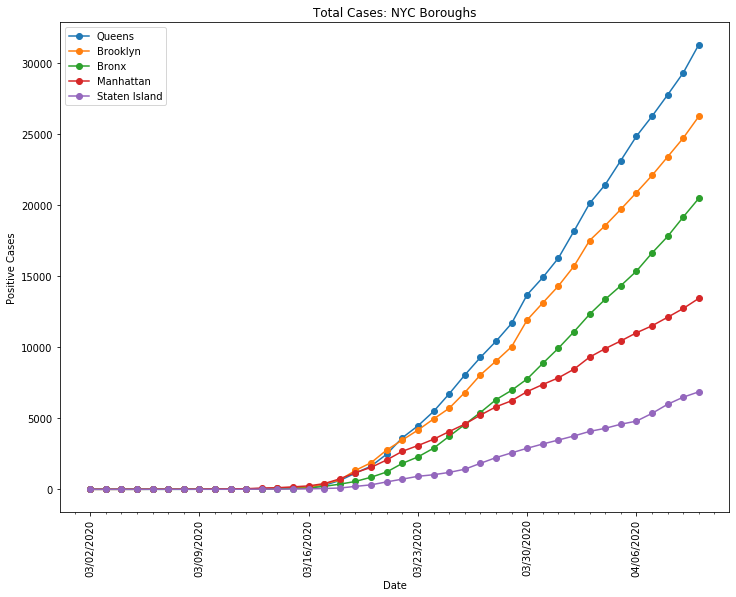

In [8]:
plt.figure(figsize=(12,9))
ax=plt.gca()
#plt.plot_date(df.index,df.Bronx.values,label='Bronx',ls='-')
plt.plot_date(df.index,df['Queens'].values,label='Queens',ls='-')
plt.plot_date(df.index,df['Kings'].values,label='Brooklyn',ls='-')

plt.plot_date(df.index,df['Bronx'].values,label='Bronx',ls='-')
plt.plot_date(df.index,df['New York'].values,label='Manhattan',ls='-')

plt.plot_date(df.index,df['Richmond'].values,label='Staten Island',ls='-')

plt.title('Total Cases: NYC Boroughs')
plt.ylabel('Positive Cases')
plt.xlabel('Date')
leg = plt.legend();

ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation='vertical')
ax=plt.gca()
plt.show()

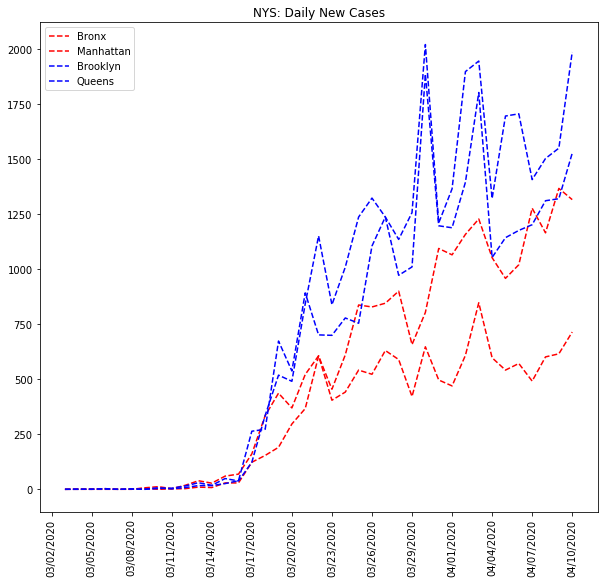

In [9]:
plt.figure(figsize=(10,9))

plt.plot_date(df.index,diff['Bronx'].values,'--r',label='Bronx')
plt.plot_date(df.index,diff['New York'].values,'--r',label='Manhattan')

plt.plot_date(df.index,diff['Kings'].values,'--b',label='Brooklyn')
plt.plot_date(df.index,diff['Queens'].values,'--b',label='Queens')
plt.xticks(rotation='vertical')
ax=plt.gca()
plt.title('NYS: Daily New Cases')
plt.xticks(rotation='vertical')
leg = plt.legend();
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.show()

#blue are east of hudson, red are west

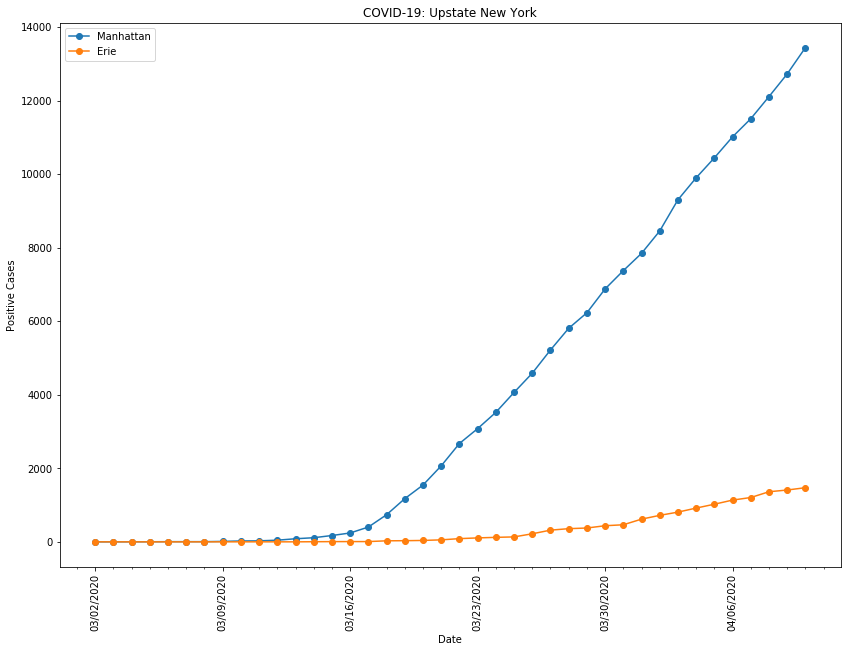

In [10]:
plt.figure(figsize=(14,10))

plt.plot_date(df.index,df['New York'].values,label='Manhattan',ls='-')
plt.plot_date(df.index,df.Erie.values,label='Erie',ls='-')


plt.title('COVID-19: Upstate New York')
plt.ylabel('Positive Cases')
plt.xlabel('Date')
leg = plt.legend();
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.xticks(rotation='vertical')

plt.show()

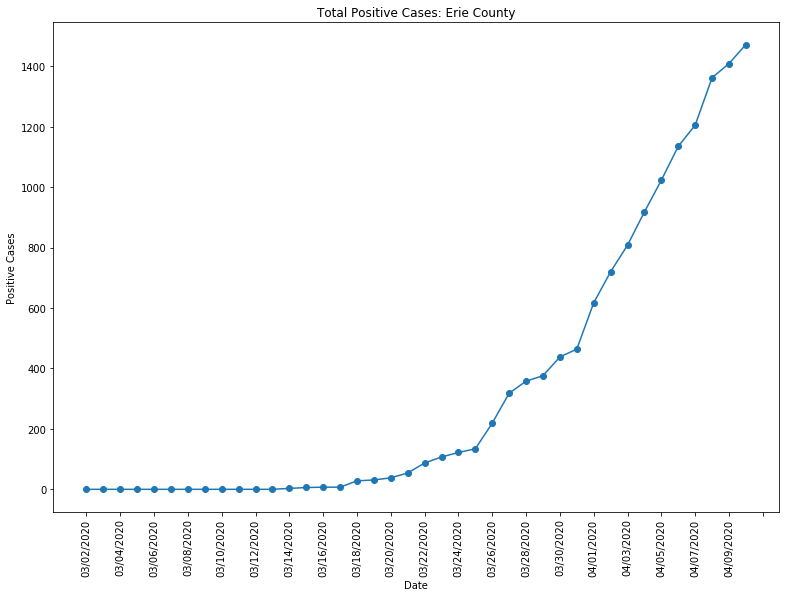

In [11]:
plt.figure(figsize=(13,9))

plt.plot_date(df.index,df['Erie'].values,label='Erie',ls='-')
#plt.plot_date(df.dates,df.Bronx.values,label='Bronx',ls='-')


plt.xticks(rotation='vertical')
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))


plt.title('Total Positive Cases: Erie County')
plt.ylabel('Positive Cases')
plt.xlabel('Date')
#leg = plt.legend();
plt.show()

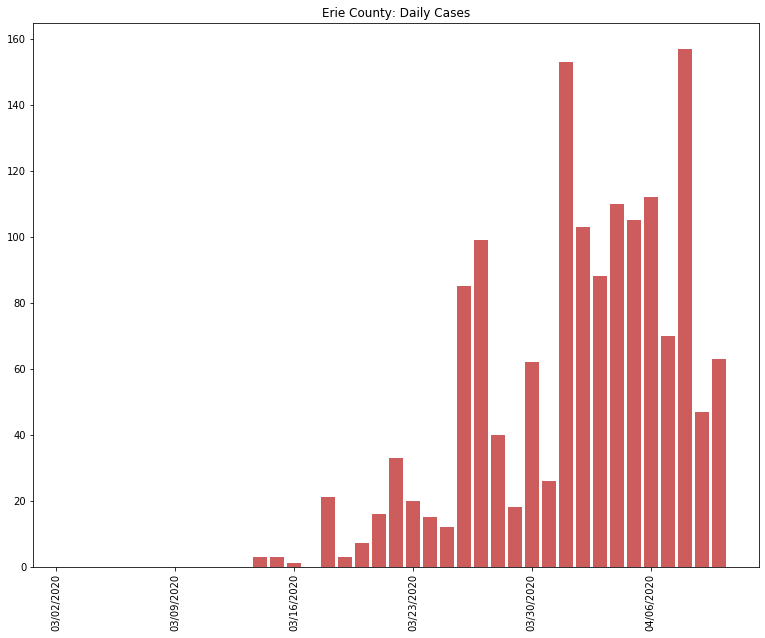

In [12]:
plt.figure(figsize=(13,10))

plt.bar(diff.index, diff['Erie'].values,color='indianred')
#plt.plot_date(df.index,diff['Erie'].values,'o',label='Daily Cases',ls='-')
plt.xticks(rotation='vertical')
ax=plt.gca()
plt.title('Erie County: Daily Cases')
plt.xticks(rotation='vertical')
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
#ax.Yaxis.set_major_locator(ticker.MultipleLocator(7))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()